In [1]:
from functions_BenfordLaw import *
from functions_CNN_PGD import *
from functions_AdversarialDetection import *
import numpy as np
from keras.datasets import mnist, fashion_mnist
import cv2
import torch
from torch import nn
from torchvision import transforms, models, datasets
from sklearn.utils import shuffle

In [2]:
use_cuda=True
device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")

# Benford's Law on MNIST Image

Gradient Magnitude Transformation

In [3]:
# mnist data
(mnist_data, _), _ = mnist.load_data()
mnist_data = mnist_data.astype(np.float32) 
mnist_image = mnist_data[np.random.randint(0, mnist_data.shape[0])]
# convert mnist_image to 28x28
mnist_image = cv2.resize(mnist_image, (28, 28))
gradient_image, gradient_distribution = run_code(mnist_image, 'gradient_magnitude')
ks_statistic, p_value = ks_test(gradient_distribution, benfords_law())
print('KS statistic:', ks_statistic)
print('P-value:', p_value)

KS statistic: 0.2222222222222222
P-value: 0.9894693541752365


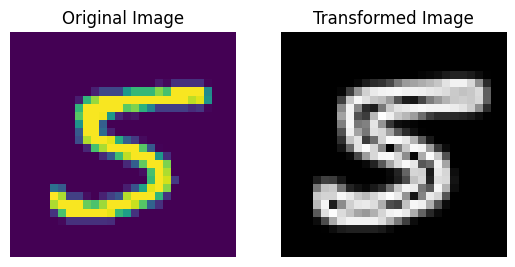

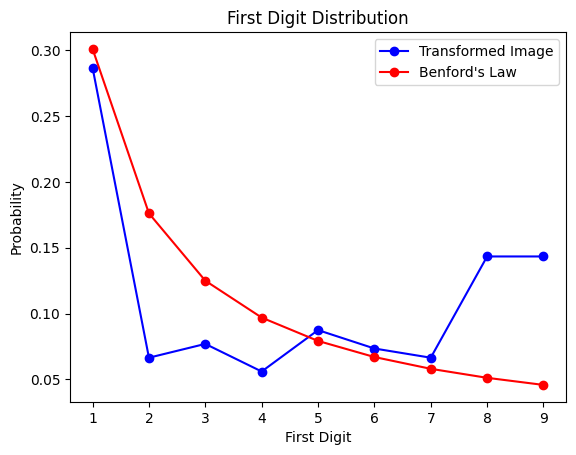

In [4]:
plot_run_code(mnist_image, 'gradient_magnitude')

DCT Transformation

In [5]:
dct_image, dct_distribution = run_code(mnist_image, 'dct')
ks_statistic, p_value = ks_test(dct_distribution, benfords_law())
print('KS statistic:', ks_statistic)
print('P-value:', p_value)

KS statistic: 0.2222222222222222
P-value: 0.9894693541752365


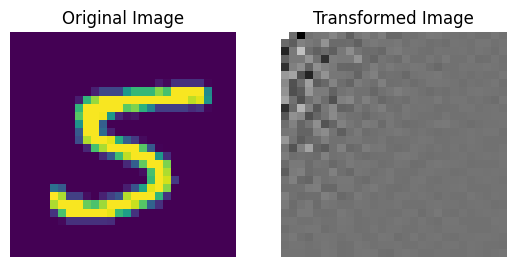

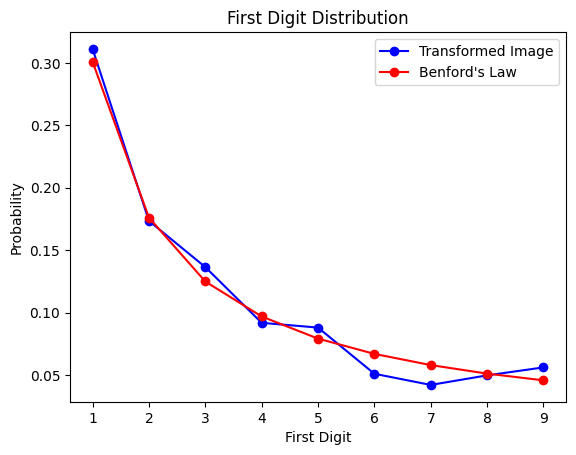

In [6]:
plot_run_code(mnist_image, 'dct')

# Benford's Law on Fashion MNIST Image

Gradient Magnitude Transformation

In [7]:
(fashion_mnist_data, _), _ = fashion_mnist.load_data()
fashion_mnist_data = fashion_mnist_data.astype(np.float32)
fashion_mnist_image = fashion_mnist_data[np.random.randint(0, fashion_mnist_data.shape[0])]
# convert fashion_mnist_image to 28x28
fashion_mnist_image = cv2.resize(fashion_mnist_image, (28, 28))
gradient_image, gradient_distribution = run_code(fashion_mnist_image, 'gradient_magnitude')
ks_statistic, p_value = ks_test(gradient_distribution, benfords_law())
print('KS statistic:', ks_statistic)
print('P-value:', p_value)

KS statistic: 0.3333333333333333
P-value: 0.7301110654051831


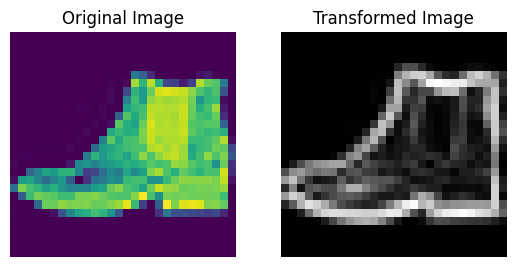

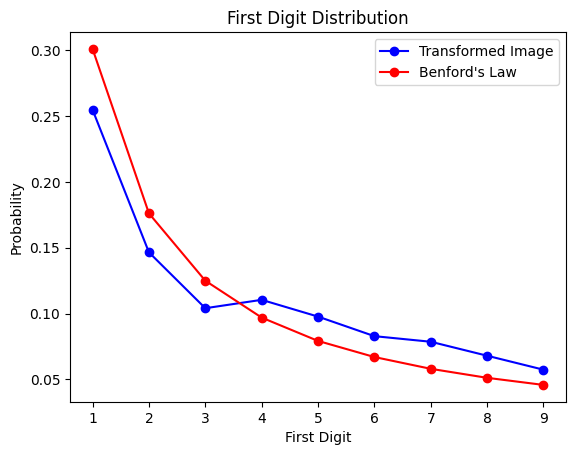

In [8]:
plot_run_code(fashion_mnist_image, 'gradient_magnitude')

DCT Transformation

In [9]:
dct_image, dct_distribution = run_code(fashion_mnist_image, 'dct')
ks_statistic, p_value = ks_test(dct_distribution, benfords_law())
print('KS statistic:', ks_statistic)
print('P-value:', p_value)

KS statistic: 0.2222222222222222
P-value: 0.9894693541752365


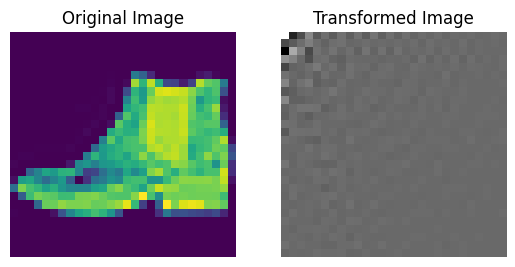

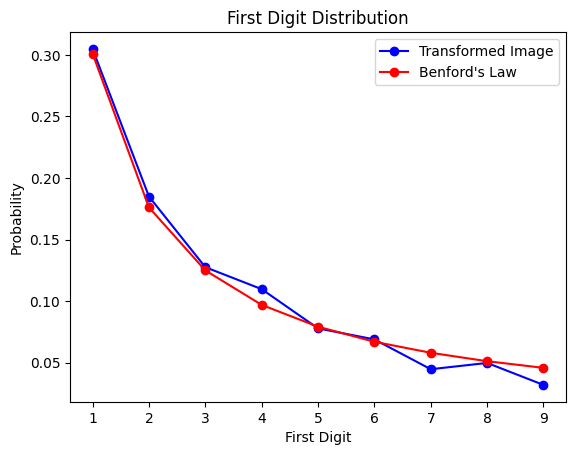

In [10]:
plot_run_code(fashion_mnist_image, 'dct')

# Loading CNN models

Model trained on MNIST dataset

In [11]:
# Loading model 
model_mnist = SimpleCNN(1).to(device)
model_mnist.load_state_dict(torch.load('model_mnist.pth'))
model_mnist.eval()

SimpleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Model trained on Fashion MNIST dataset

In [12]:
# loading model
model_fashion_mnist = SimpleCNN(1).to(device)
model_fashion_mnist.load_state_dict(torch.load('model_fashion.pth'))
model_fashion_mnist.eval()

SimpleCNN(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# Performing PGD Adversarial Attack

In [13]:
# Creating dataloaders for the attack
mnist_test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
mnist_loader = create_loader(mnist_test_dataset, num_samples=1000)
fashion_test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)
fashion_loader = create_loader(fashion_test_dataset, num_samples=1000)

MNIST Dataset

In [14]:
# Attack on the mnist model
mnist_adv_images, mnist_orig_images, mnist_accuracy = test_pgd(model_mnist, device, mnist_loader, 0.3)
print('Accuracy: ', mnist_accuracy)

Performing PGD attack with epsilon = 0.3


100%|█████████▉| 999/1000 [01:23<00:00, 12.01it/s]

Accuracy:  0.0


Fashion MNIST Dataset

In [15]:
# Attack on the fashion mnist model
fashion_adv_images, fashion_orig_images, fashion_accuracy = test_pgd(model_fashion_mnist, device, fashion_loader, 0.3)
print('Accuracy: ', fashion_accuracy)

Performing PGD attack with epsilon = 0.3


100%|█████████▉| 999/1000 [01:22<00:00, 12.15it/s]

Accuracy:  0.0


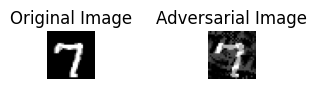

Predicted: 8


In [16]:
# Example of adversarial images
plot_images_and_prediction(model_mnist, mnist_adv_images, mnist_orig_images)

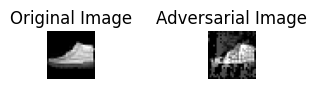

Predicted: 2


In [17]:
# Example of adversarial images
plot_images_and_prediction(model_fashion_mnist, fashion_adv_images, fashion_orig_images)

# Benford's Law on Adversarial Images

Gradient Magnitude Transformation

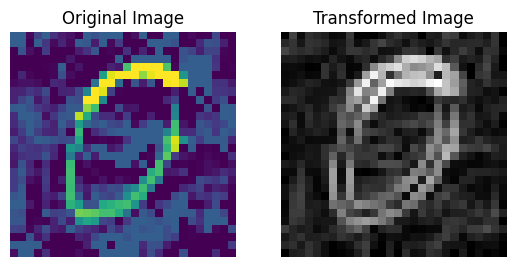

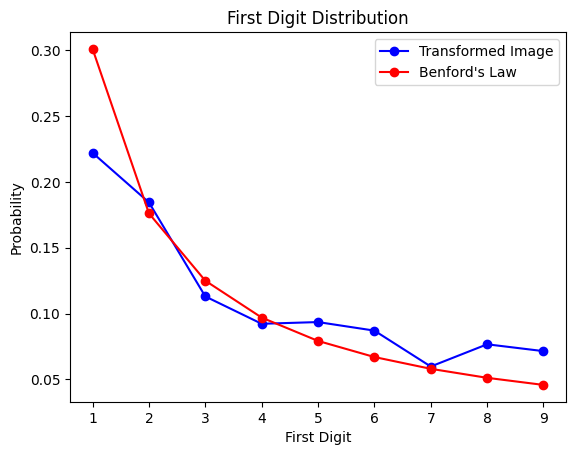

KS statistic: 0.3333333333333333
P-value: 0.7301110654051831


In [18]:
process_and_test_image(mnist_adv_images[0], 'gradient_magnitude')   

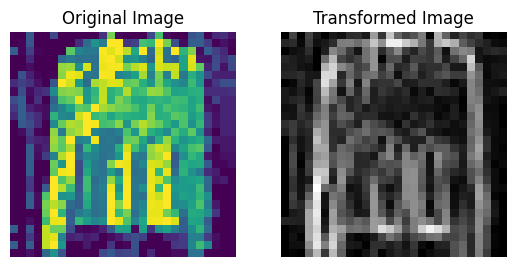

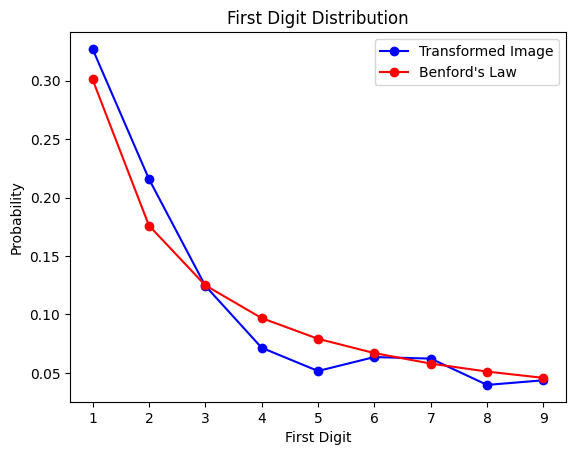

KS statistic: 0.2222222222222222
P-value: 0.9894693541752365


In [19]:
process_and_test_image(fashion_adv_images[0], 'gradient_magnitude')

DCT Transformation

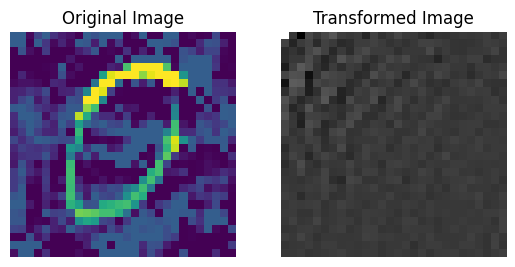

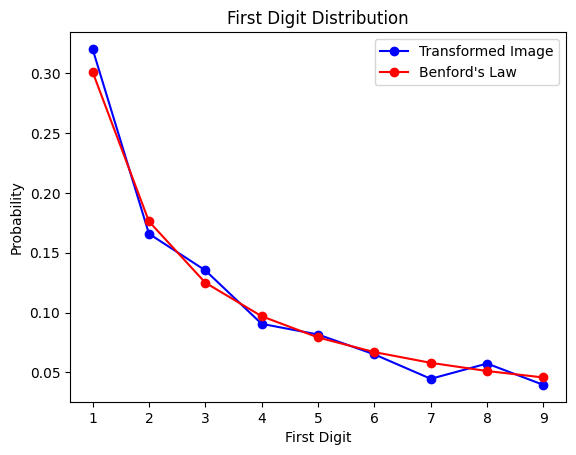

KS statistic: 0.2222222222222222
P-value: 0.9894693541752365


In [20]:
process_and_test_image(mnist_adv_images[0], 'dct')   

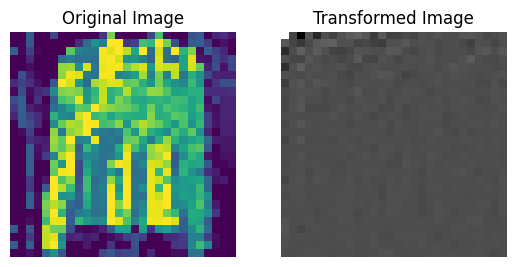

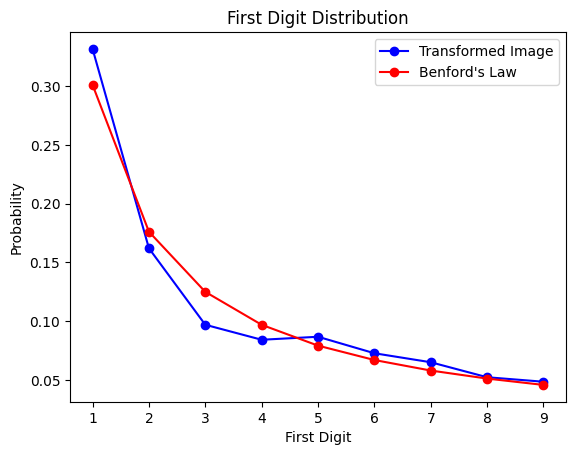

KS statistic: 0.1111111111111111
P-value: 1.0


In [21]:
process_and_test_image(fashion_adv_images[0], 'dct')

# Adversarial Image Detection

Gradient Magnitude Transformation

In [22]:
mnist_orig_images, mnist_adv_images = process_images(mnist_orig_images, mnist_adv_images)

In [23]:
fashion_orig_images, fashion_adv_images = process_images(fashion_orig_images, fashion_adv_images)

In [24]:
transformation = 'gradient_magnitude'
mnist_ks_stats, mnist_y, mnist_model, mnist_accuracy, mnist_precision, mnist_recall, mnist_f1 = train_and_evaluate_model(mnist_orig_images, mnist_adv_images, transformation)
fashion_ks_stats, fashion_y, fashion_model, fashion_accuracy, fashion_precision, fashion_recall, fashion_f1 = train_and_evaluate_model(fashion_orig_images, fashion_adv_images, transformation)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
print('Mnist accuracy:', mnist_accuracy)
print('Mnist precision:', mnist_precision)
print('Mnist recall:', mnist_recall)
print('Mnist f1:', mnist_f1)

print('Fashion accuracy:', fashion_accuracy)
print('Fashion precision:', fashion_precision)
print('Fashion recall:', fashion_recall)
print('Fashion f1:', fashion_f1)

Mnist accuracy: 0.9725
Mnist precision: 0.9702970297029703
Mnist recall: 0.9751243781094527
Mnist f1: 0.9727047146401985
Fashion accuracy: 0.7825
Fashion precision: 0.75
Fashion recall: 0.8507462686567164
Fashion f1: 0.7972027972027972


In [26]:
mnist_ks_stats_shuffled, mnist_y_shuffled = shuffle(mnist_ks_stats, mnist_y)
fashion_ks_stats_shuffled, fashion_y_shuffled = shuffle(fashion_ks_stats, fashion_y)

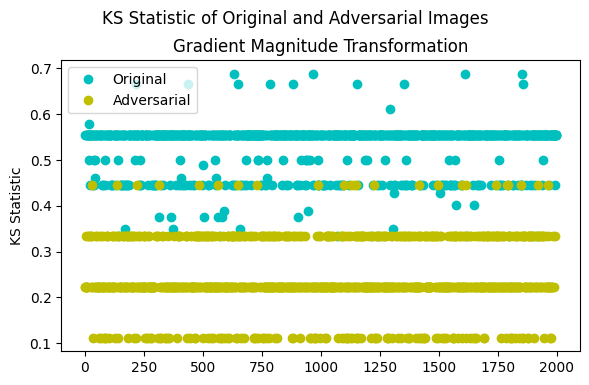

In [27]:
plot_ks_stats(mnist_y_shuffled, mnist_ks_stats_shuffled, transformation)

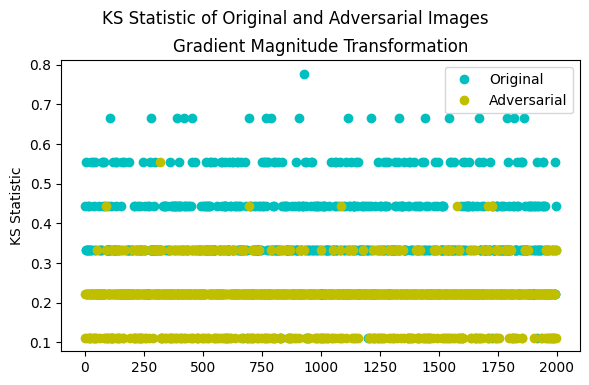

In [28]:
plot_ks_stats(fashion_y_shuffled, fashion_ks_stats_shuffled, transformation)

DCT Transformation

In [29]:
transformation = 'dct'
mnist_ks_stats, mnist_y, mnist_model, mnist_accuracy, mnist_precision, mnist_recall, mnist_f1 = train_and_evaluate_model(mnist_orig_images, mnist_adv_images, transformation)
fashion_ks_stats, fashion_y, fashion_model, fashion_accuracy, fashion_precision, fashion_recall, fashion_f1 = train_and_evaluate_model(fashion_orig_images, fashion_adv_images, transformation)

c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('Mnist accuracy:', mnist_accuracy)
print('Mnist precision:', mnist_precision)
print('Mnist recall:', mnist_recall)
print('Mnist f1:', mnist_f1)

print('Fashion accuracy:', fashion_accuracy)
print('Fashion precision:', fashion_precision)
print('Fashion recall:', fashion_recall)
print('Fashion f1:', fashion_f1)

Mnist accuracy: 0.5175
Mnist precision: 0.5425531914893617
Mnist recall: 0.2537313432835821
Mnist f1: 0.34576271186440677
Fashion accuracy: 0.6075
Fashion precision: 0.5738255033557047
Fashion recall: 0.8507462686567164
Fashion f1: 0.685370741482966


In [31]:
mnist_ks_stats_shuffled, mnist_y_shuffled = shuffle(mnist_ks_stats, mnist_y)
fashion_ks_stats_shuffled, fashion_y_shuffled = shuffle(fashion_ks_stats, fashion_y)

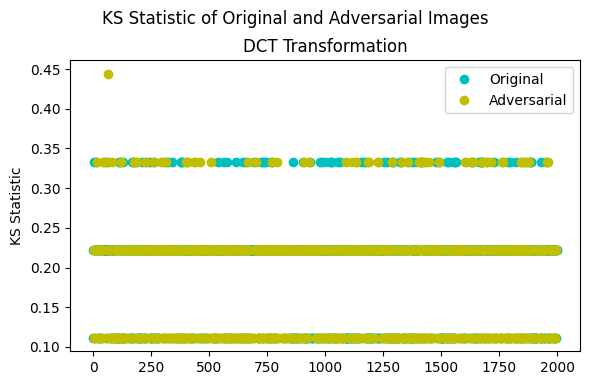

In [32]:
plot_ks_stats(mnist_y_shuffled, mnist_ks_stats_shuffled, transformation)

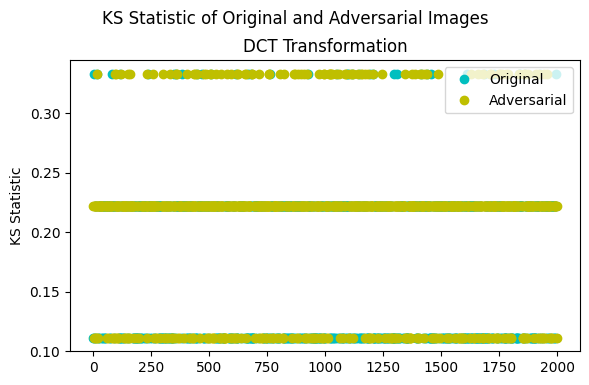

In [33]:
plot_ks_stats(fashion_y_shuffled, fashion_ks_stats_shuffled, transformation)